    x         y     y_err                                    Name  size
0   0  1.000000  0.010656                MatrixMultiplication/384   384
1   1  1.889611  0.023471                MatrixMultiplication/384   384
2   2  2.664825  0.047364                MatrixMultiplication/384   384
3   3  3.202547  0.203908                MatrixMultiplication/384   384
4   4  4.161187  0.103246                MatrixMultiplication/384   384
5   5  4.533050  0.148236                MatrixMultiplication/384   384
6   0  1.000000  0.031835                MatrixMultiplication/764   764
7   1  2.116708  0.029848                MatrixMultiplication/764   764
8   2  3.126454  0.031971                MatrixMultiplication/764   764
9   3  4.218447  0.019383                MatrixMultiplication/764   764
10  4  4.823432  0.137386                MatrixMultiplication/764   764
11  5  5.082182  0.099171                MatrixMultiplication/764   764
12  0  1.000000  0.038578               MatrixMultiplication/115

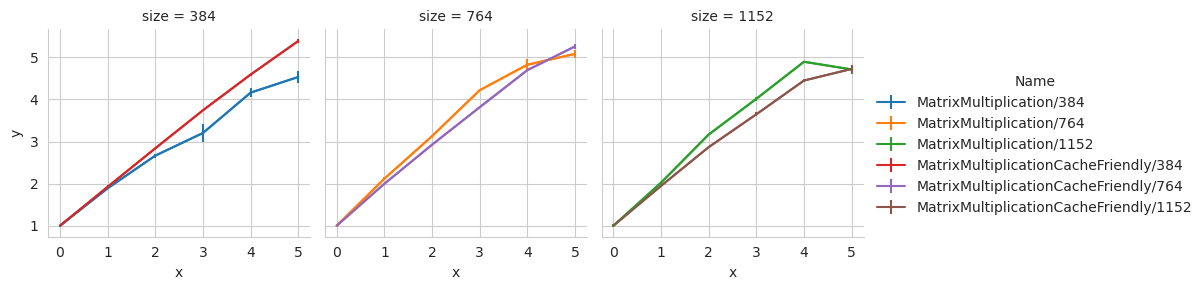

In [97]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

num_threads = 6
num_rows    = 4

benchmark_transform    = pd.read_csv("benchmark_transform.csv")
benchmark_no_transform = pd.read_csv("benchmark_no_transform.csv")

benchmark = pd.concat([benchmark_no_transform, benchmark_transform], ignore_index=True)

num_lines = len(benchmark["name"]);
num_tests = int(num_lines / num_threads / num_rows)

titles = []

x = []
y = []
y_err = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads * num_rows].split("/")

    titles.append(name[0] + '/' + name[2])

    y_max = benchmark["real_time"][i * num_threads * num_rows + 0]

    for j in range(num_threads):
        y    .append(benchmark["real_time"][(i * num_threads + j) * num_rows + 0])
        y_err.append(benchmark["real_time"][(i * num_threads + j) * num_rows + 3])

        y_err[-1] = y[-1] * y_err[-1] / 100

        norm      = y[-1]
        y[-1]     = y_max     / norm
        y_err[-1] = y_err[-1] / norm

        hue.append(titles[-1])
        size.append(name[2])

        x.append(j)

data = list(zip(x, y, y_err, hue, size))
dataFrame = pd.DataFrame(data, columns=["x", "y", "y_err", "Name", "size"])

print(dataFrame)

sns.set_style("whitegrid")
g = sns.FacetGrid(data=dataFrame, col="size", col_wrap=3, hue="Name")
g.map(sns.lineplot, "x", "y")
g.map(plt.errorbar, "x", "y", "y_err");
# g.map(plt.grid)
g.add_legend()

